In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

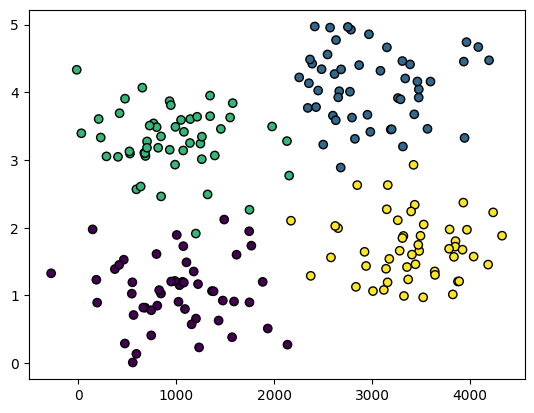

In [ ]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)

In [ ]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [ ]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [ ]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [ ]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

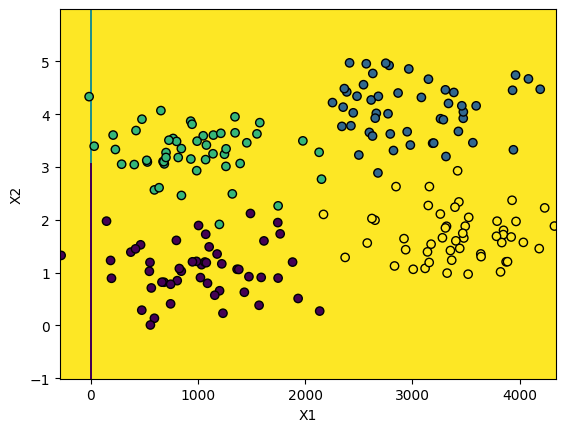

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)

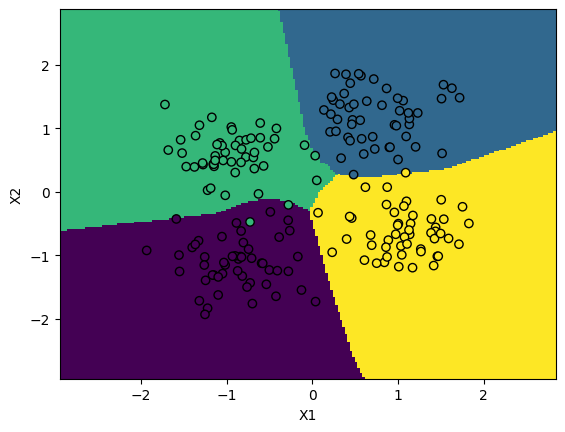

In [ ]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

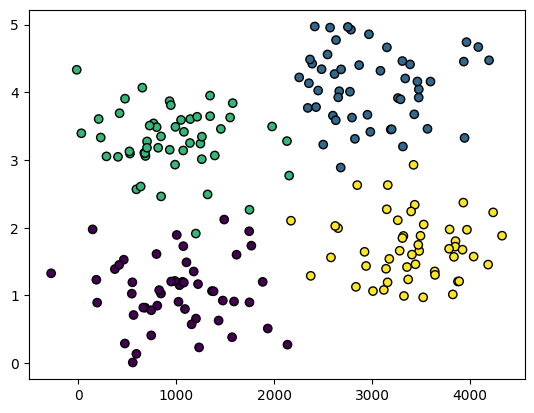

In [ ]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

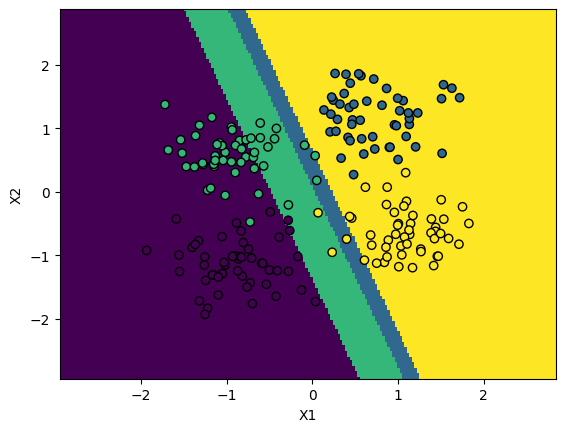

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[48,  0,  2,  0],
       [ 0,  0,  0, 50],
       [38,  2,  9,  1],
       [ 0,  2,  2, 46]])

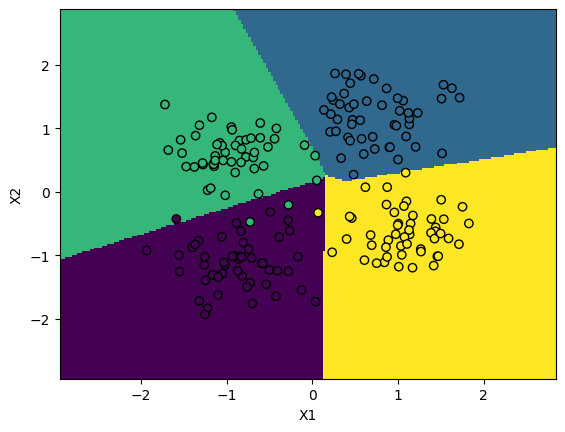

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(2,), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

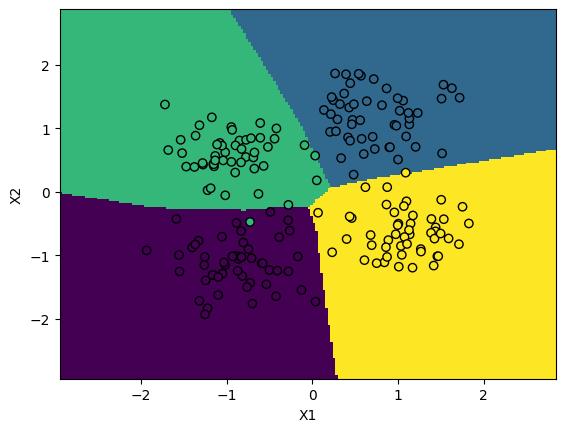

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  1,  0, 49]])

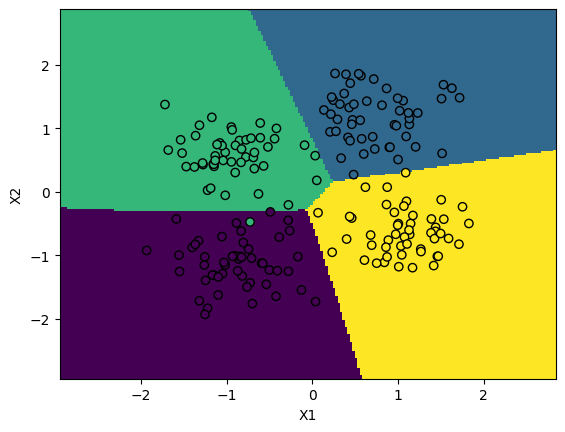

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]])

Лучше всего работает с 100

2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

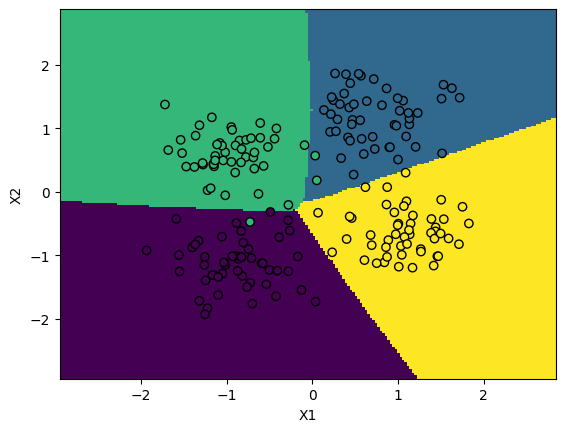

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(6,6), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

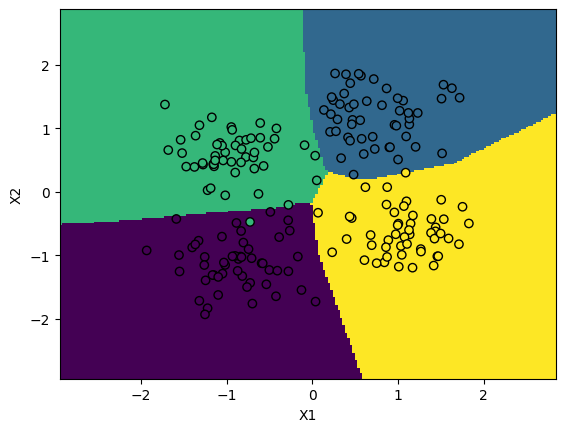

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(6,6,6), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

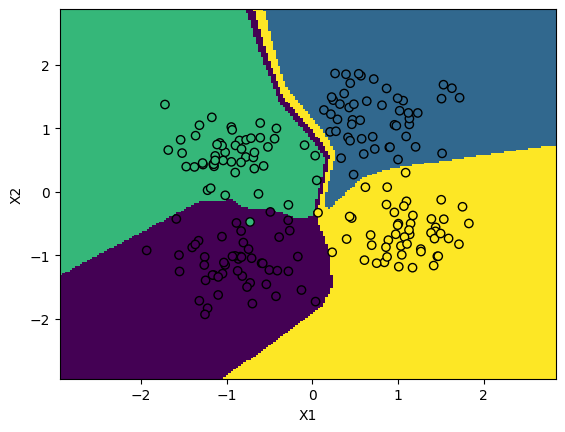

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(6,6,6,6,6,6,6,6,6,6), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Лучше всего с 3 словами

3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

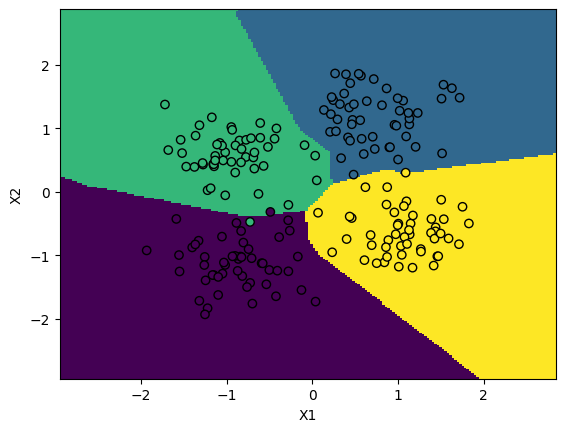

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(6,6,6), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[2])

Веса между входным и скрытым слоем:
[[-9.73690947e-01 -1.03450078e+00 -9.66508156e-01 -8.86157911e-01
   1.53839565e-01  1.71249319e-07]
 [-1.02970109e+00  6.14123659e-01 -7.47089468e-01 -4.15802381e-01
  -8.87961364e-01 -9.83645376e-07]]

Веса между скрытым и выходным слоем:
[[ 2.41040234e-06  3.62254318e-01 -5.16117174e-01  5.25386020e-01
   6.66745577e-07  1.00036712e+00]
 [-2.98734152e-05 -7.47678832e-02  8.25355735e-01 -1.37794009e+00
  -4.74472438e-04  8.68028815e-01]
 [-5.88040680e-04 -6.95189590e-02 -3.62494381e-01  3.55315358e-01
  -8.02189556e-02  1.03678066e+00]
 [-7.91638108e-02 -7.30870646e-02 -4.79500141e-01  9.31547174e-01
   4.80380658e-02 -7.40867055e-02]
 [ 4.00369707e-20 -1.31877745e-01 -4.97368580e-02  1.07119323e+00
  -1.70540870e-06  8.57044666e-01]
 [ 2.27832631e-03  5.76311350e-02  1.98692710e-02  7.27421227e-03
  -2.39857136e-08  8.93142565e-02]]

Веса между скрытым и выходным слоем:
[[ 1.13658953e-02  1.69153503e-03 -2.76068767e-03 -5.67065830e-06
   1.2928772

In [ ]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[2])

Веса смещения для скрытого слоя:
[-0.37529642  0.67599588  1.23884174 -0.84191012  0.90402032 -0.7148427 ]

Веса смещения для выходного слоя:
[-0.13364785 -0.32796001  1.20431481  0.57755725 -0.4296555  -0.32540557]

Веса смещения для выходного слоя:
[ 0.95839102 -0.60819012  0.34486436  1.17499194  0.33957324  0.03222082]


4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

58.603681802749634


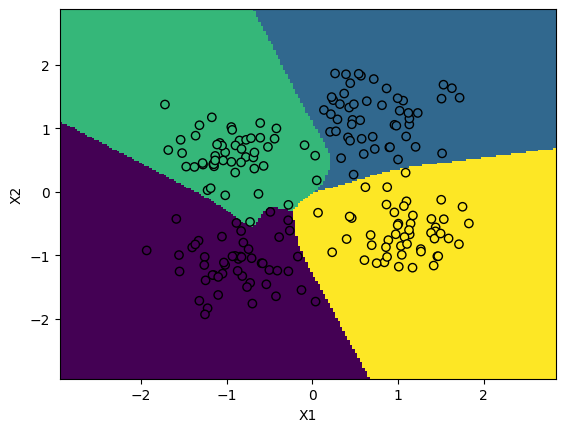

In [ ]:
import time

start = time.time()

confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(1000,1000,1000,1000,1000,1000), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
print(time.time() - start)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

С большим количеством слоёв и нейронов модель значительно дольше обучается

5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [ ]:
from sklearn.datasets import fetch_openml

datal = fetch_openml(name='vertebra-column')

X = datal.data
y = datal.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name vertebra-column exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10_000).fit(X, y)

In [ ]:
confusion_matrix(y, clf.predict(X))
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled = scaler.transform(X)

clf = MLPClassifier(hidden_layer_sizes=(6,6,6), max_iter=10_000).fit(X_scaled, y)

X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
confusion_matrix(y, clf.predict(X_scaled))

array([[ 46,  14,   0],
       [ 14,  84,   2],
       [  1,   1, 148]])

6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.datasets import fetch_openml

datal = fetch_openml(name='vertebra-column')

X = datal.data
y = datal.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name vertebra-column exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создаем модель перцептрона
model = Perceptron(max_iter=1000)

# Тренируем модель на тренировочных данных
model.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8225806451612904
